In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt


In [14]:
total = pd.read_csv("https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv")
total['Date'] = pd.to_datetime(total['Date'])

total = total.set_index('Date')

#total = total.sort_values(by='Date')

In [15]:
total.head()

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,,
2024-05-17,2381.4,2427.4,2377.8,2417.4,5.0500,80.06,104.44,1.0870,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99
2024-05-16,2391.5,2402.7,2375.2,2385.5,4.8770,79.23,104.46,1.0865,497.51,16698.32,85.22,1071.3,2096.25,29.876,5297.10,12.42
2024-05-15,2362.9,2396.1,2357.1,2394.9,4.9245,78.63,104.35,1.0882,490.06,16742.39,85.26,1070.1,2109.46,29.729,5308.15,12.45
2024-05-14,2342.3,2365.2,2340.5,2359.9,4.8950,78.02,105.01,1.0818,488.11,16511.18,84.06,1044.6,2085.69,28.702,5246.68,13.42
2024-05-13,2369.1,2370.8,2337.6,2343.0,4.7660,79.12,105.22,1.0788,485.51,16388.24,83.28,1010.8,2062.12,28.443,5221.42,13.60


In [16]:
total.shape

(3720, 16)

In [17]:
total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3720 entries, 2024-05-17 to 2010-01-04
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gold_open   3720 non-null   float64
 1   gold_high   3720 non-null   float64
 2   gold_low    3720 non-null   float64
 3   gold_close  3720 non-null   float64
 4   copper      3720 non-null   float64
 5   crude_oil   3720 non-null   float64
 6   DXY         3720 non-null   float64
 7   EURUSD      3720 non-null   float64
 8   MSCI        3720 non-null   float64
 9   NASDAQ      3720 non-null   float64
 10  NLR         3720 non-null   float64
 11  platinum    3720 non-null   float64
 12  RUT         3720 non-null   float64
 13  silver      3720 non-null   float64
 14  SP500       3720 non-null   float64
 15  VIX         3720 non-null   float64
dtypes: float64(16)
memory usage: 494.1 KB


In [18]:
total.describe()

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
count,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.00000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000
mean,1506.819207,1517.430511,1495.507513,1506.650255,3.279966,71.931489,91.714409,1.19433,200.305366,7192.250793,52.924890,1167.202473,1364.694855,21.705610,2605.963435,18.440054
std,293.260044,295.670367,290.817123,293.249431,0.672051,21.741839,9.240168,0.11425,194.425939,4166.916278,8.630502,307.408636,460.425547,6.200591,1133.026514,7.026051
min,1051.500000,1062.700000,1044.500000,1049.600000,1.943500,-37.630000,72.930000,0.95920,25.590000,2091.790000,34.080000,595.200000,586.490000,11.772000,1022.600000,9.140000
25%,1256.875000,1264.375000,1248.800000,1256.475000,2.733875,52.857500,81.705000,1.10180,38.492500,3613.022500,47.917500,926.900000,1010.750000,16.833500,1675.825000,13.597500
50%,1400.500000,1415.350000,1387.150000,1400.800000,3.229250,73.070000,94.040000,1.16470,96.295000,5860.925000,50.810000,1019.450000,1353.050000,19.848000,2356.400000,16.645000
75%,1766.050000,1778.925000,1753.275000,1765.250000,3.780625,90.622500,98.010000,1.29865,378.712500,10910.607500,55.200000,1451.925000,1696.630000,24.988250,3483.425000,21.300000
max,2391.500000,2448.800000,2377.800000,2417.400000,5.050000,123.700000,114.110000,1.48280,675.150000,16742.390000,87.390000,1917.400000,2442.740000,48.599000,5308.150000,82.690000


<Axes: >

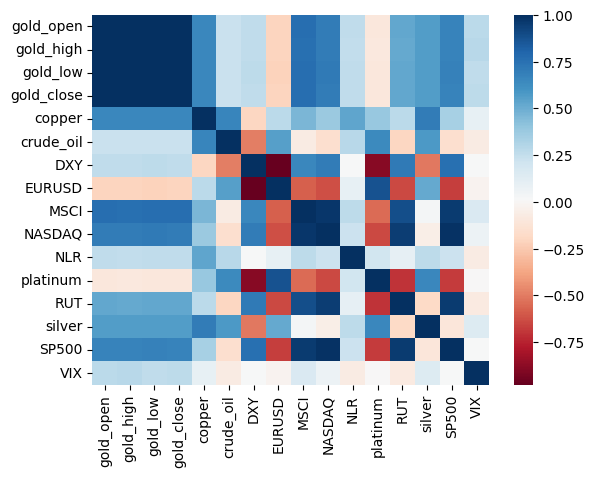

In [19]:
sns.heatmap(total.corr(), cmap="RdBu")

# Chia Dataset thành 3 tập (Training, Validation và Testing)

In [20]:
total = pd.read_csv("https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv")
total['Date'] = pd.to_datetime(total['Date'])
total = total.set_index('Date')
total = total.sort_values(by='Date')
# Shift the target variable
total['gold_close_next_day'] = total['gold_close'].shift(-1)

total

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX,gold_close_next_day
Date,,,,,,,,,,,,,,,,,
2010-01-04,1099.0,1124.6,1093.8,1118.3,3.4060,81.51,77.53,1.4413,31.98,2308.42,69.57,1528.45,640.10,17.463,1133.00,20.04,1118.7
2010-01-05,1122.0,1129.6,1115.5,1118.7,3.4135,81.77,77.62,1.4369,32.10,2308.71,70.14,1536.30,638.49,17.800,1136.50,19.35,1136.5
2010-01-06,1118.5,1141.0,1116.8,1136.5,3.4945,83.18,77.49,1.4413,31.23,2301.09,71.01,1563.30,637.95,18.175,1137.10,19.16,1133.7
2010-01-07,1139.0,1139.5,1128.7,1133.7,3.4270,82.66,77.91,1.4318,33.38,2300.05,70.62,1555.10,641.97,18.345,1141.70,19.06,1138.9
2010-01-08,1131.5,1140.0,1119.5,1138.9,3.4005,82.75,77.47,1.4413,34.50,2317.17,71.19,1581.20,644.56,18.470,1145.00,18.13,1151.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13,2369.1,2370.8,2337.6,2343.0,4.7660,79.12,105.22,1.0788,485.51,16388.24,83.28,1010.80,2062.12,28.443,5221.42,13.60,2359.9
2024-05-14,2342.3,2365.2,2340.5,2359.9,4.8950,78.02,105.01,1.0818,488.11,16511.18,84.06,1044.60,2085.69,28.702,5246.68,13.42,2394.9
2024-05-15,2362.9,2396.1,2357.1,2394.9,4.9245,78.63,104.35,1.0882,490.06,16742.39,85.26,1070.10,2109.46,29.729,5308.15,12.45,2385.5


In [21]:
from sklearn.model_selection import train_test_split

# Drop the last row as it will have NaN target after shifting
total = total.dropna()

# Split features and target
X = total.drop(['gold_close', 'gold_close_next_day'], axis=1)
y = total['gold_close_next_day']

# Split the data
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, shuffle=False)

# Reset indices for train, valid, and test sets
train_valid = total.loc[X_train_valid.index]
train = total.loc[X_train.index]
test_dataset = total.loc[X_test.index]
valid_val = total.loc[X_valid.index]
train_set = train
valid_set = valid_val
test_set = test_dataset

# Print shapes of the datasets
print("Training_Valid Features Shape:", X_train_valid.shape)
print("Training_Valid Labels Shape:", y_train_valid.shape)
print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Valid Features Shape:", X_valid.shape)
print("Valid Labels Shape:", y_valid.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training_Valid Features Shape: (2789, 15)
Training_Valid Labels Shape: (2789,)
Train Features Shape: (2231, 15)
Train Labels Shape: (2231,)
Valid Features Shape: (558, 15)
Valid Labels Shape: (558,)
Testing Features Shape: (930, 15)
Testing Labels Shape: (930,)


In [22]:
train_valid

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX,gold_close_next_day
Date,,,,,,,,,,,,,,,,,
2010-01-04,1099.0,1124.6,1093.8,1118.3,3.4060,81.51,77.53,1.4413,31.98,2308.42,69.57,1528.45,640.10,17.463,1133.0,20.04,1118.7
2010-01-05,1122.0,1129.6,1115.5,1118.7,3.4135,81.77,77.62,1.4369,32.10,2308.71,70.14,1536.30,638.49,17.800,1136.5,19.35,1136.5
2010-01-06,1118.5,1141.0,1116.8,1136.5,3.4945,83.18,77.49,1.4413,31.23,2301.09,71.01,1563.30,637.95,18.175,1137.1,19.16,1133.7
2010-01-07,1139.0,1139.5,1128.7,1133.7,3.4270,82.66,77.91,1.4318,33.38,2300.05,70.62,1555.10,641.97,18.345,1141.7,19.06,1138.9
2010-01-08,1131.5,1140.0,1119.5,1138.9,3.4005,82.75,77.47,1.4413,34.50,2317.17,71.19,1581.20,644.56,18.470,1145.0,18.13,1151.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,1906.0,1913.2,1892.7,1908.9,3.0855,40.96,93.86,1.1706,361.62,11713.97,46.42,861.30,1638.88,24.224,3483.3,26.97,1906.4
2020-10-16,1912.7,1918.7,1901.1,1906.4,3.0675,40.88,93.68,1.1718,365.61,11671.66,46.79,869.30,1633.81,24.405,3483.8,27.41,1911.7
2020-10-19,1903.2,1923.4,1900.2,1911.7,3.0860,40.83,93.43,1.1766,362.67,11478.98,46.79,863.50,1613.63,24.698,3426.9,29.18,1915.4


In [23]:
total_size = len(train_set) + len(valid_set) + len(test_set)
print("Training set ratio:", len(train_set) / total_size)
print("Validation set ratio:", len(valid_set) / total_size)
print("Test set ratio:", len(test_set) / total_size)

Training set ratio: 0.5998924442054315
Validation set ratio: 0.15004033342296316
Test set ratio: 0.2500672223716053


In [24]:
X_train

,gold_open,gold_high,gold_low,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,
2010-01-04,1099.0,1124.6,1093.8,3.4060,81.51,77.53,1.4413,31.98,2308.42,69.57,1528.45,640.10,17.463,1133.0,20.04
2010-01-05,1122.0,1129.6,1115.5,3.4135,81.77,77.62,1.4369,32.10,2308.71,70.14,1536.30,638.49,17.800,1136.5,19.35
2010-01-06,1118.5,1141.0,1116.8,3.4945,83.18,77.49,1.4413,31.23,2301.09,71.01,1563.30,637.95,18.175,1137.1,19.16
2010-01-07,1139.0,1139.5,1128.7,3.4270,82.66,77.91,1.4318,33.38,2300.05,70.62,1555.10,641.97,18.345,1141.7,19.06
2010-01-08,1131.5,1140.0,1119.5,3.4005,82.75,77.47,1.4413,34.50,2317.17,71.19,1581.20,644.56,18.470,1145.0,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-17,1180.7,1192.0,1178.5,2.6350,65.91,96.10,1.1439,173.28,7816.33,52.07,788.10,1692.95,14.631,2850.1,12.64
2018-08-20,1190.4,1197.7,1189.6,2.6745,66.43,95.90,1.1481,174.17,7821.01,52.37,795.90,1698.69,14.670,2857.1,12.49
2018-08-21,1197.3,1204.3,1194.3,2.7005,67.35,95.26,1.1571,173.54,7859.17,52.37,795.30,1718.05,14.766,2863.0,12.86


In [25]:
X_test

,gold_open,gold_high,gold_low,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,
2020-10-22,1927.4,1929.4,1894.2,3.1535,40.64,92.95,1.1816,347.63,11506.01,47.18,884.0,1630.25,24.709,3453.50,28.11
2020-10-23,1906.5,1917.3,1895.2,3.1290,39.85,92.77,1.1859,350.55,11548.28,47.27,906.7,1640.50,24.675,3465.40,27.55
2020-10-26,1906.0,1911.1,1892.5,3.0895,38.56,93.04,1.1808,349.56,11358.94,46.86,877.4,1605.21,24.420,3401.00,32.46
2020-10-27,1904.4,1913.8,1898.7,3.0935,39.57,92.94,1.1795,356.90,11431.35,46.66,886.8,1590.48,24.570,3390.70,33.35
2020-10-28,1909.8,1912.6,1869.1,3.0640,37.39,93.40,1.1744,340.68,11004.87,45.26,875.0,1543.28,23.359,3271.00,40.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,2353.5,2385.3,2352.0,4.6625,78.26,105.30,1.0769,484.89,16340.87,83.54,1007.2,2059.78,28.506,5222.68,12.55
2024-05-13,2369.1,2370.8,2337.6,4.7660,79.12,105.22,1.0788,485.51,16388.24,83.28,1010.8,2062.12,28.443,5221.42,13.60
2024-05-14,2342.3,2365.2,2340.5,4.8950,78.02,105.01,1.0818,488.11,16511.18,84.06,1044.6,2085.69,28.702,5246.68,13.42


# Modeling

In [26]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Ramdom Search with Cross Validation

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [29]:
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 timeseriessplit
tscv = TimeSeriesSplit(n_splits=3)

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = tscv, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [30]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

### Top 10 best_params

In [31]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [32]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

100
Model with rank: 1
Mean validation score: -12.097 (std: 2.109)
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 2
Mean validation score: -12.112 (std: 2.382)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 3
Mean validation score: -12.116 (std: 2.412)
Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 4
Mean validation score: -12.162 (std: 2.484)
Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 5
Mean validation score: -12.575 (std: 2.081)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 

## Evaluation Function

In [33]:
import joblib


In [34]:
y_test = np.array(y_test)

def ACC(model, X_test, y_test, X_train_valid, y_train_valid):    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_valid)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_valid, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_valid,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_test,y_pred))
    print()
    
    sns.displot(y_test - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_test, color = 'red', label="GOLD Price")
    ax.plot(y_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()
    
def AUC(model, X_valid, y_valid, X_train, y_train):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_valid)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_val_pred))

    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_valid, y_val_pred)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", train_rmse)

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", train_mape)
    print()
    

    print("Test accuracy for valid set")
    #RMSE
    print("Root Mean Square Error (RMSE):", val_rmse)

    #MAPE
    print(" Mean Absolute Percentage Error (MAPE):", val_mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_valid,y_val_pred))
    print()
    
    sns.displot(y_valid - y_val_pred, kde=True)
    plt.xlabel('y_valid - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_valid, y=y_val_pred)
    plt.xlabel('y_valid')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(valid_val.index, y_valid, color='red', label="GOLD Price")
    ax.plot(valid_val.index, y_val_pred, color='green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()

    print()

## Evaluate the Default Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 5.7453160354655655
Mean Absolute Percentage Error (MAPE): 0.002998448134782453

Test accuracy for valid set
Root Mean Square Error (RMSE): 64.77766621102718
 Mean Absolute Percentage Error (MAPE): 0.018964239910318485

R2 score: 0.9231894639069628



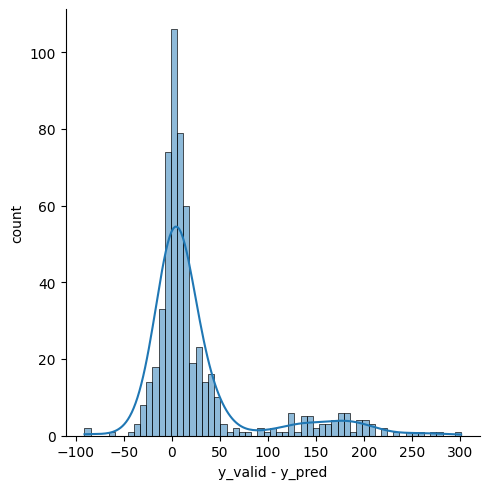

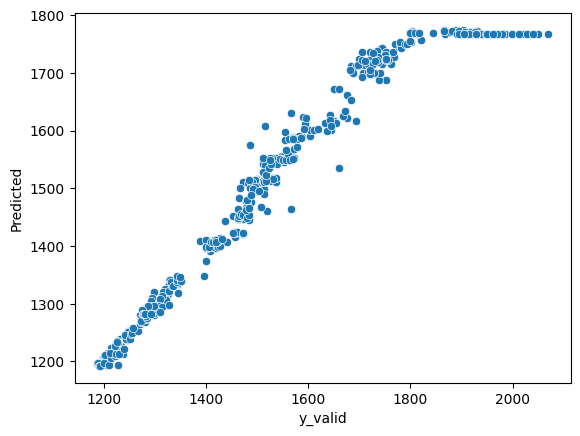

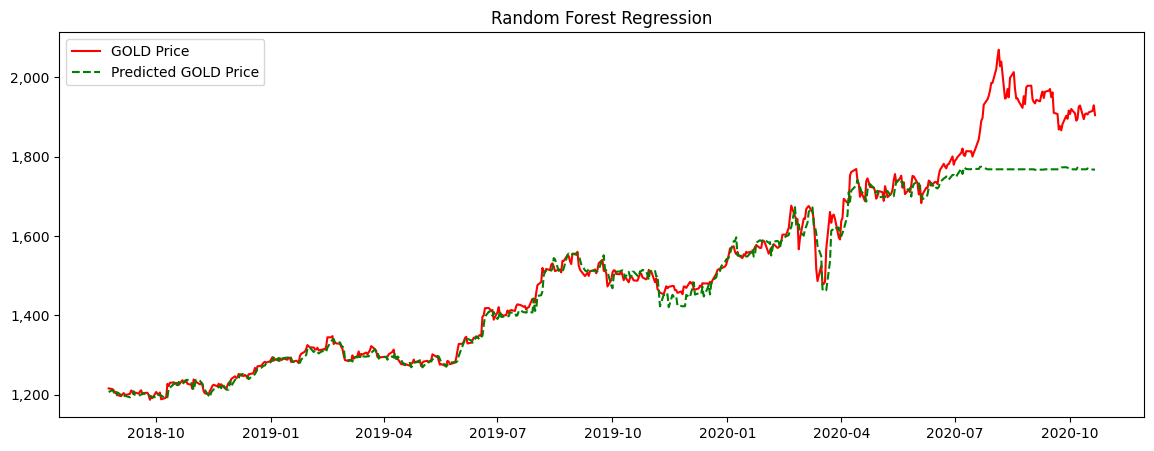

['base_model.pkl']

In [35]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = AUC(base_model, X_valid, y_valid, X_train, y_train)
joblib.dump(base_model, "base_model.pkl")

## Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [4, 8, 10, 12, None],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500, 800, 900]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)
tscv = TimeSeriesSplit(n_splits=3)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, return_train_score=True)

In [37]:
grid_search.fit(X_train, y_train);

In [38]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 10.759235063486981
Mean Absolute Percentage Error (MAPE): 0.005695179119936254

Test accuracy for valid set
Root Mean Square Error (RMSE): 59.64170244006997
 Mean Absolute Percentage Error (MAPE): 0.01735065913896405

R2 score: 0.9348866162557674



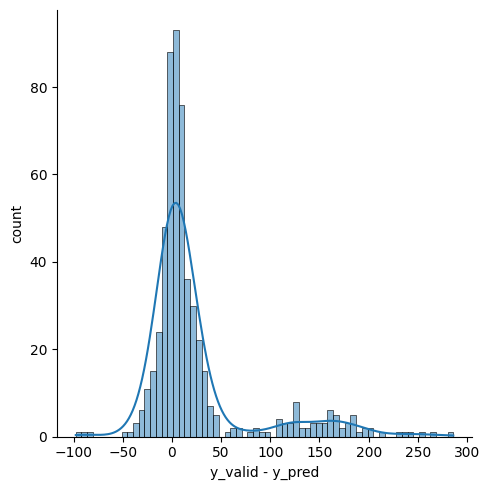

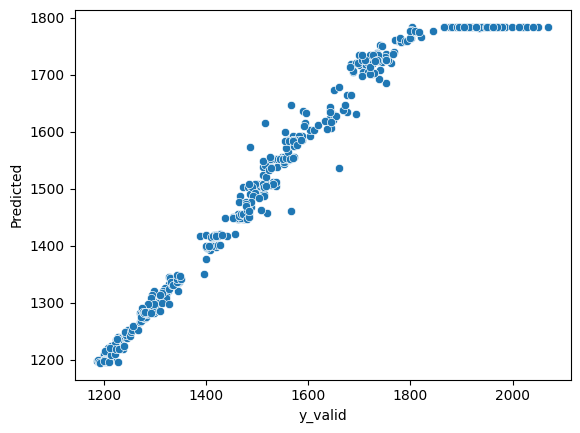

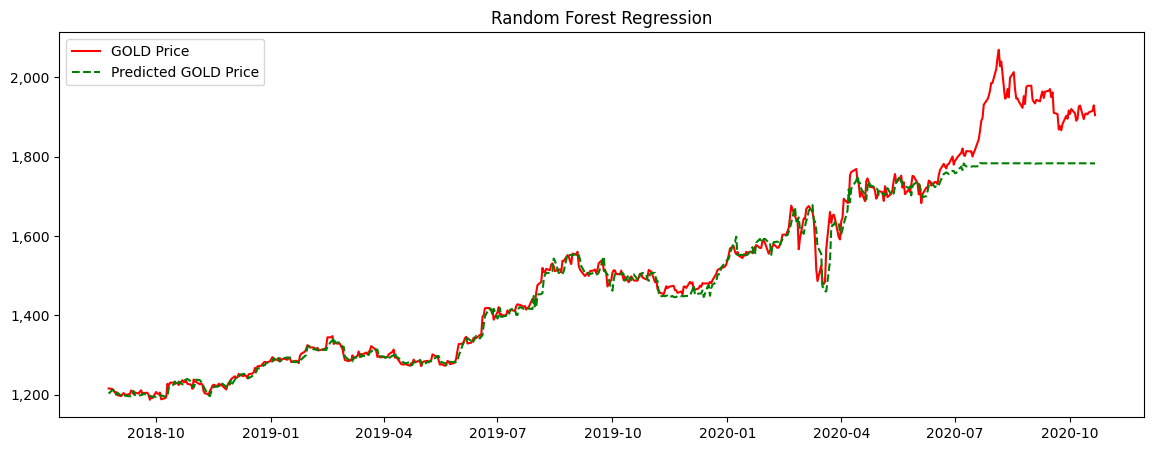

['best_grid.pkl']

In [39]:
best_grid = grid_search.best_estimator_
grid_accuracy = AUC(best_grid, X_valid, y_valid, X_train, y_train)
joblib.dump(best_grid, "best_grid.pkl")

# Evaluate

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 6.110173547265098
Mean Absolute Percentage Error (MAPE): 0.002984007888129089

Test accuracy for test set
Root Mean Square Error (RMSE): 75.93370218603503
 Mean Absolute Percentage Error (MAPE): 0.019000920689142997

R2 score: 0.7149034647255597



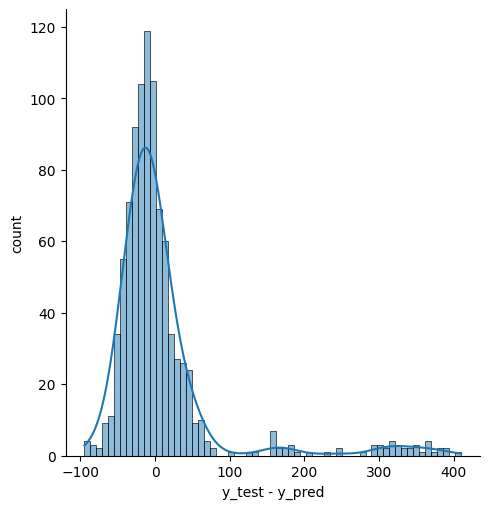

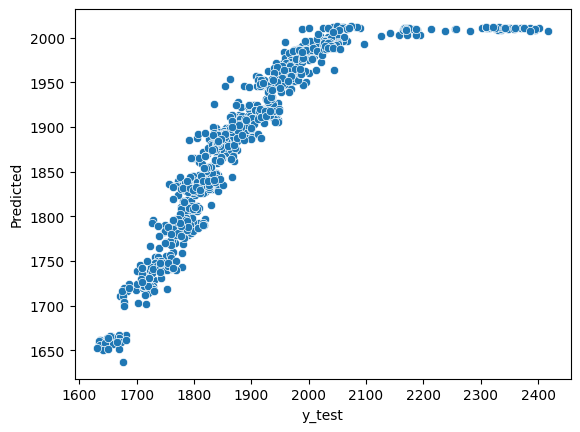

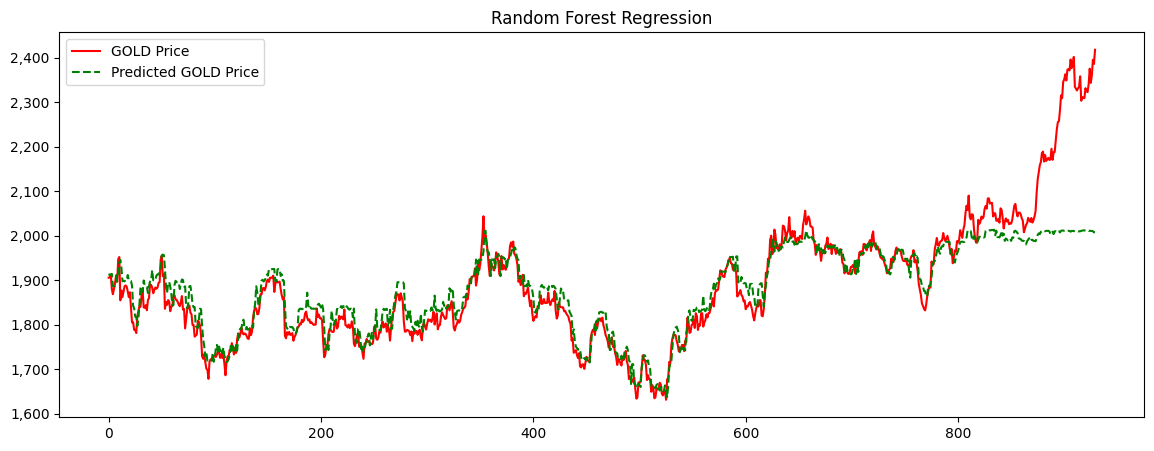

['base_model.pkl']

In [40]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train_valid, y_train_valid)
base_accuracy = ACC(base_model, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(base_model, "base_model.pkl")

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 11.515465017392131
Mean Absolute Percentage Error (MAPE): 0.005761612867201046

Test accuracy for test set
Root Mean Square Error (RMSE): 77.26763760718374
 Mean Absolute Percentage Error (MAPE): 0.018007040622123296

R2 score: 0.7047988407101948



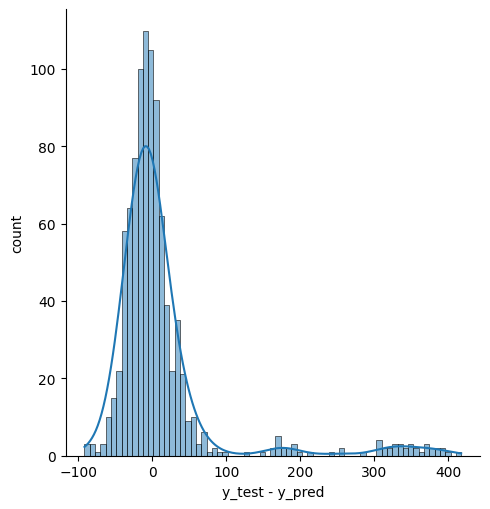

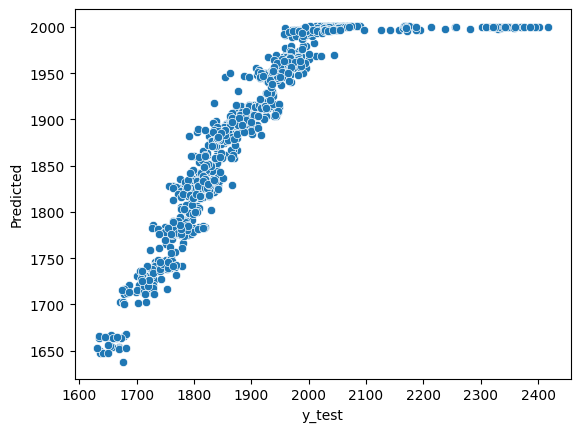

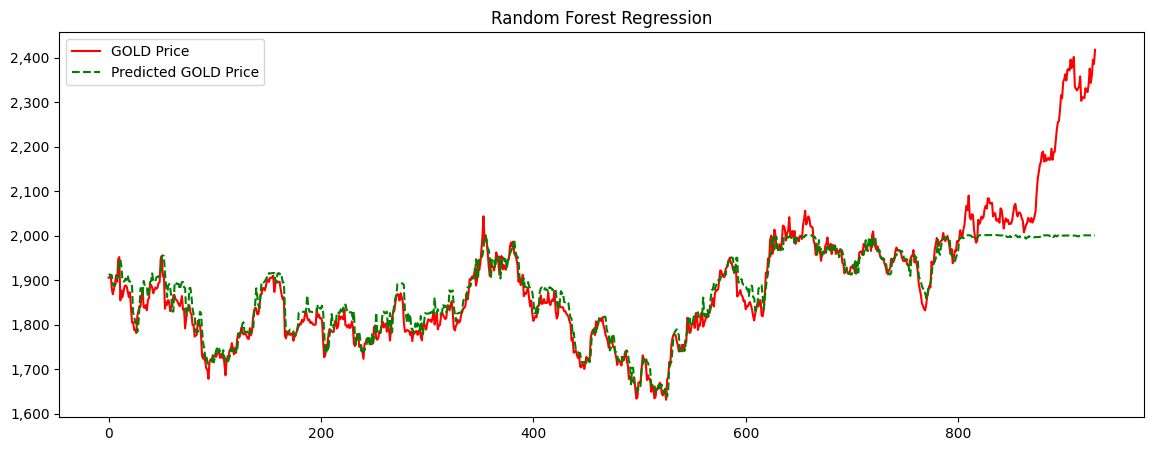

['best_grid.pkl']

In [41]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_valid, y_train_valid)
grid_accuracy = ACC(best_grid, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(best_grid, "best_grid.pkl")

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 10.356837388200338
Mean Absolute Percentage Error (MAPE): 0.004994193599080437

Test accuracy for test set
Root Mean Square Error (RMSE): 76.98895227029027
 Mean Absolute Percentage Error (MAPE): 0.017939953488440703

R2 score: 0.7069244362749607



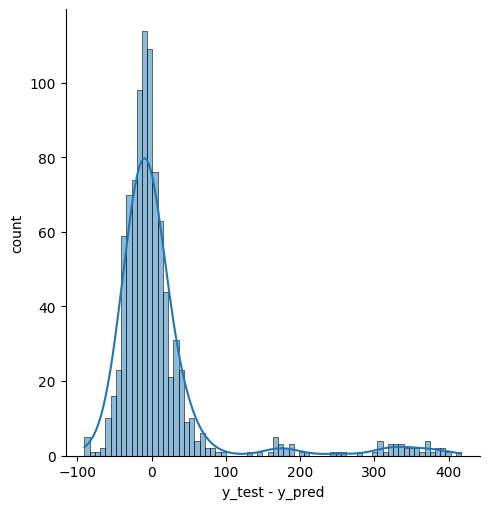

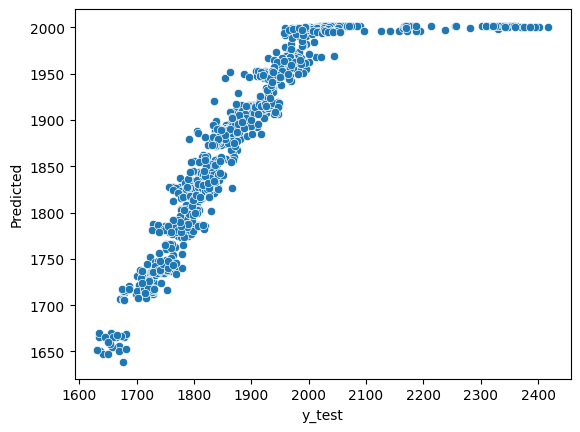

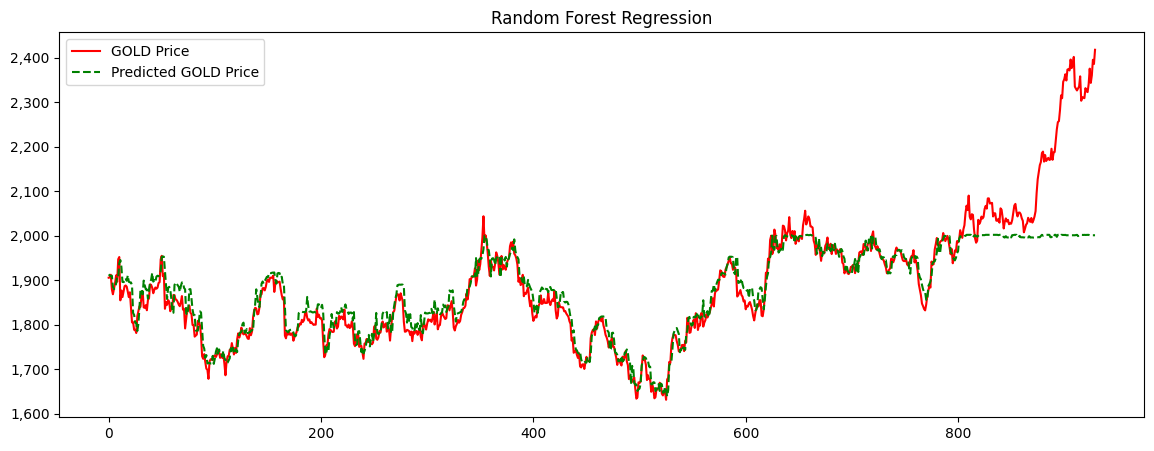

['best_random.pkl']

In [42]:
best_random = RandomForestRegressor(**rf_random.best_params_)
best_random.fit(X_train_valid, y_train_valid)
random_accuracy = ACC(best_random, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(best_random, "best_random.pkl")


# Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler


In [44]:
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train_valid)

# Transform the features
X_train_valid_scaled = scaler.transform(X_train_valid)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Random Forest Regressor with Randomized Search
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 5.743558553966493
Mean Absolute Percentage Error (MAPE): 0.0029978030657175714

Test accuracy for valid set
Root Mean Square Error (RMSE): 64.77734464875562
 Mean Absolute Percentage Error (MAPE): 0.0189633994807209

R2 score: 0.9231902264941508



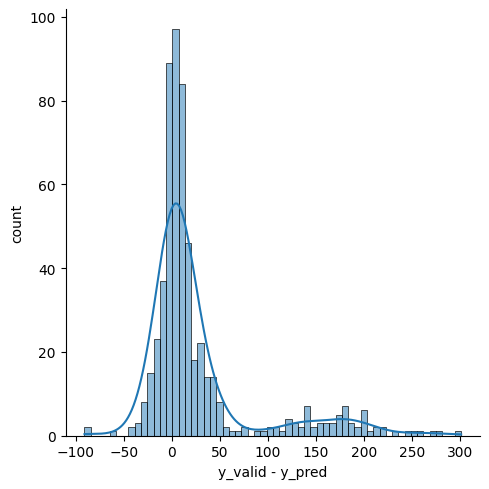

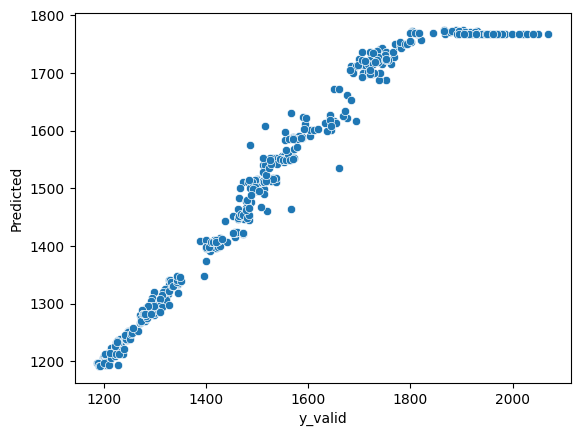

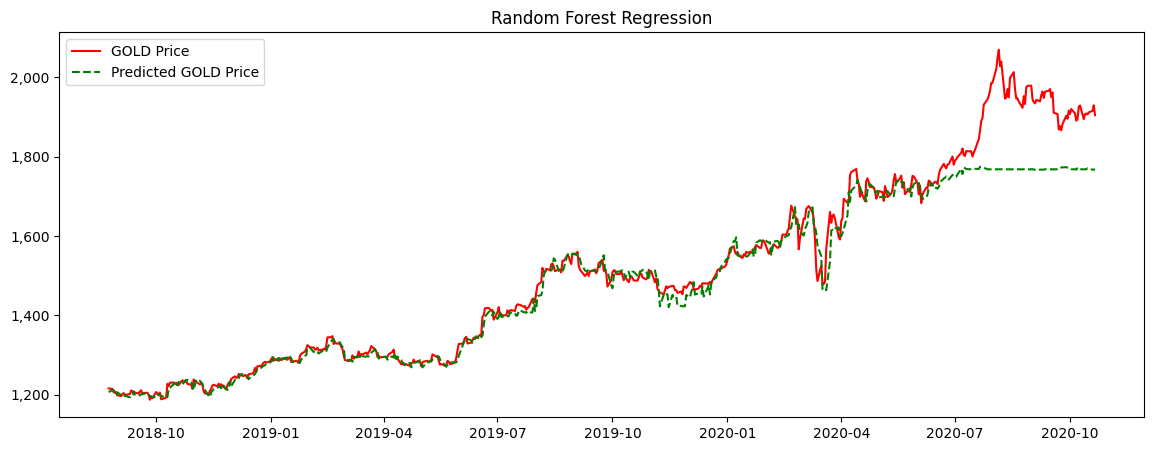

['base_model1.pkl']

In [46]:

# Evaluate the Default Model
base_model.fit(X_train_scaled, y_train)
base_accuracy = AUC(base_model, X_valid_scaled, y_valid, X_train_scaled, y_train)
joblib.dump(base_model, "base_model1.pkl")

In [47]:
# Grid Search
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 10.757560515091674
Mean Absolute Percentage Error (MAPE): 0.0056951517031531475

Test accuracy for valid set
Root Mean Square Error (RMSE): 59.64070089457675
 Mean Absolute Percentage Error (MAPE): 0.017349127289895794

R2 score: 0.9348888030970482



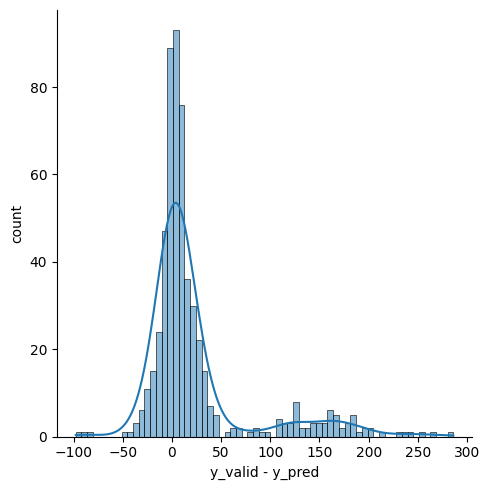

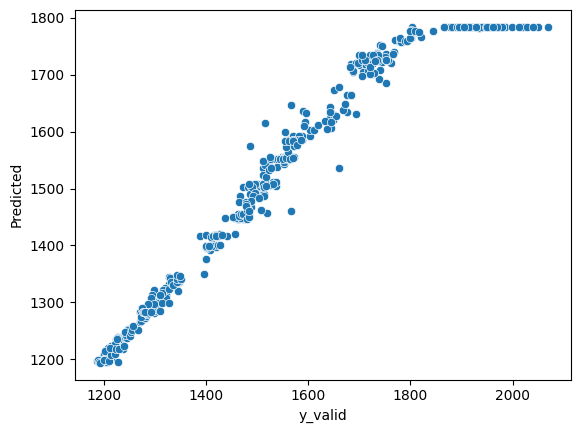

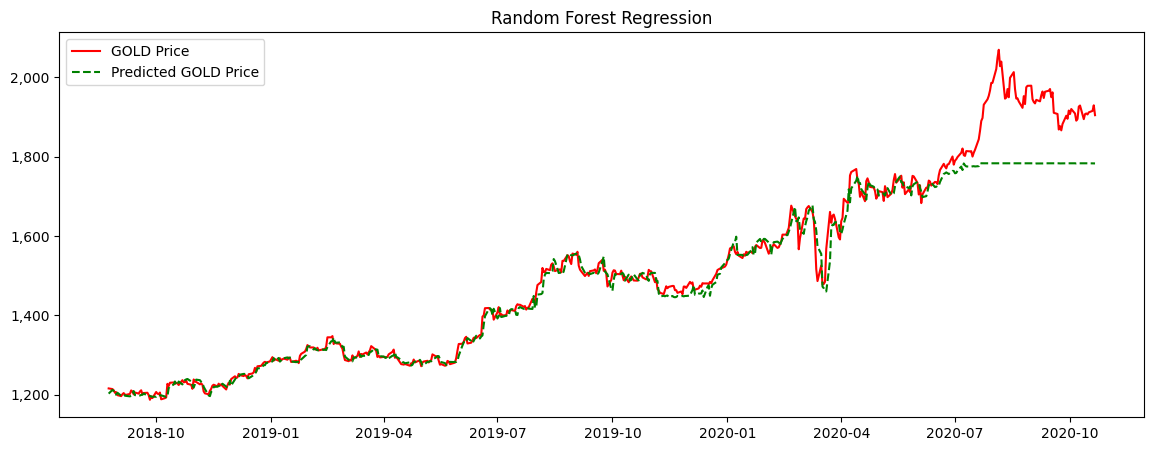

['best_grid1.pkl']

In [48]:
best_grid = grid_search.best_estimator_
grid_accuracy = AUC(best_grid, X_valid_scaled, y_valid, X_train_scaled, y_train)
joblib.dump(best_grid, "best_grid1.pkl")


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 6.111070969540871
Mean Absolute Percentage Error (MAPE): 0.002984835150387704

Test accuracy for test set
Root Mean Square Error (RMSE): 75.93134667449401
 Mean Absolute Percentage Error (MAPE): 0.018994997292823036

R2 score: 0.7149211522014469



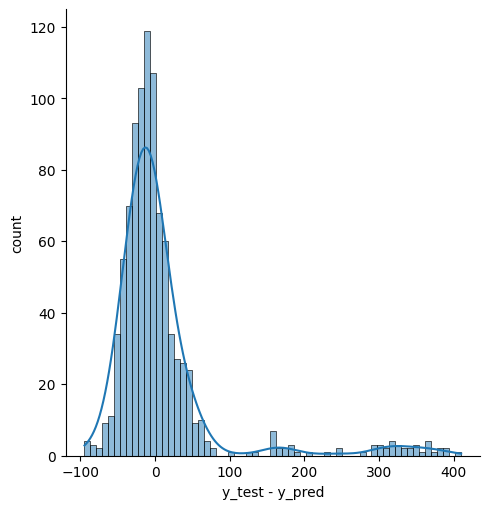

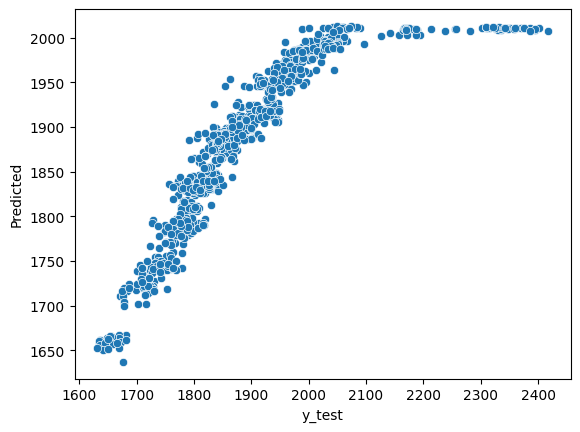

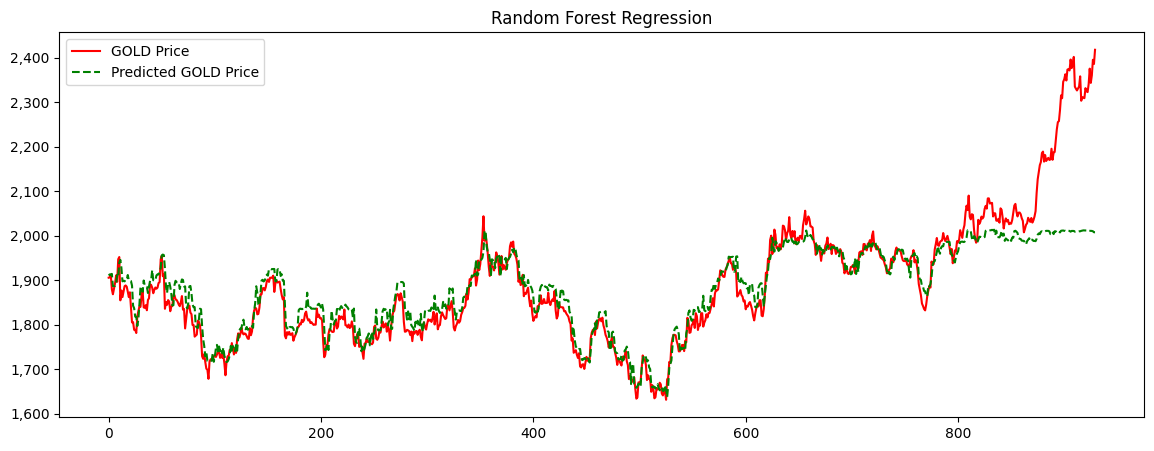

['base_model1.pkl']

In [49]:
# Evaluate on test set
base_model.fit(X_train_valid_scaled, y_train_valid)
base_accuracy = ACC(base_model, X_test_scaled, y_test, X_train_valid_scaled, y_train_valid)
joblib.dump(base_model, "base_model1.pkl")


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 11.514831956626182
Mean Absolute Percentage Error (MAPE): 0.005761495600586546

Test accuracy for test set
Root Mean Square Error (RMSE): 77.26667786308903
 Mean Absolute Percentage Error (MAPE): 0.018000286728342127

R2 score: 0.7048061740730001



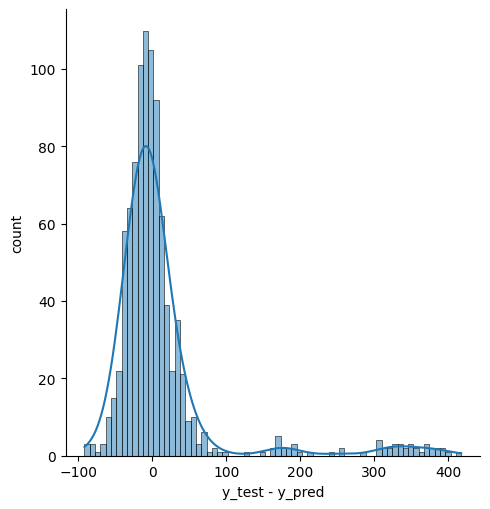

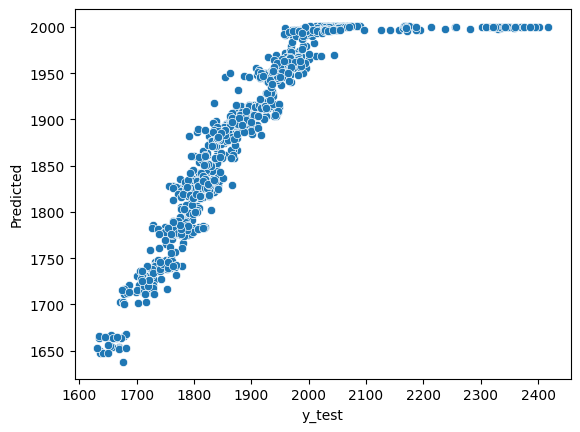

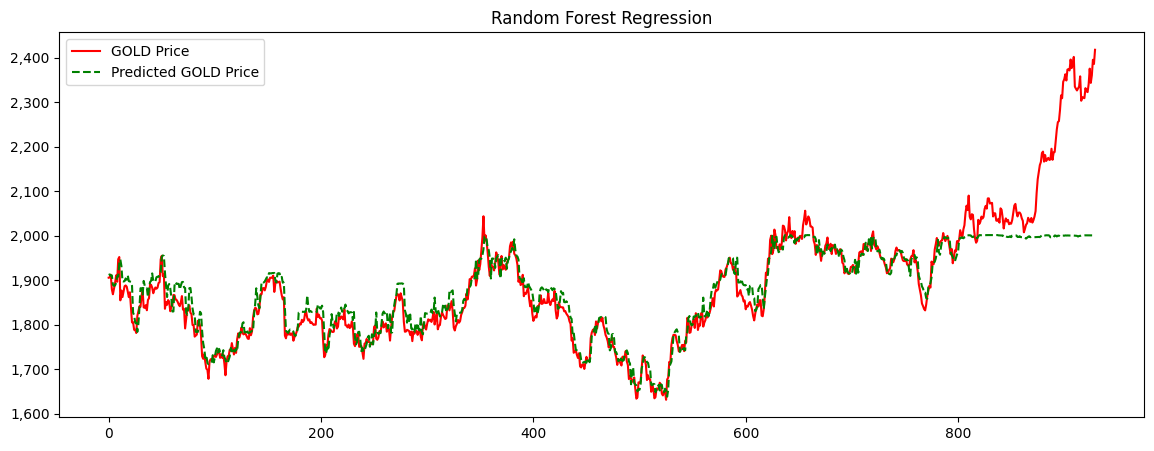

['best_grid1.pkl']

In [50]:
best_grid.fit(X_train_valid_scaled, y_train_valid)
grid_accuracy = ACC(best_grid, X_test_scaled, y_test, X_train_valid_scaled, y_train_valid)
joblib.dump(best_grid, "best_grid1.pkl")


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 10.327414278615159
Mean Absolute Percentage Error (MAPE): 0.004961619588524815

Test accuracy for test set
Root Mean Square Error (RMSE): 76.28569342689882
 Mean Absolute Percentage Error (MAPE): 0.01787428697184465

R2 score: 0.7122542043748936



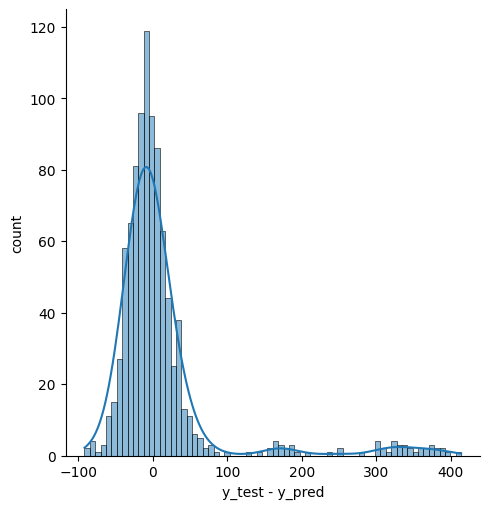

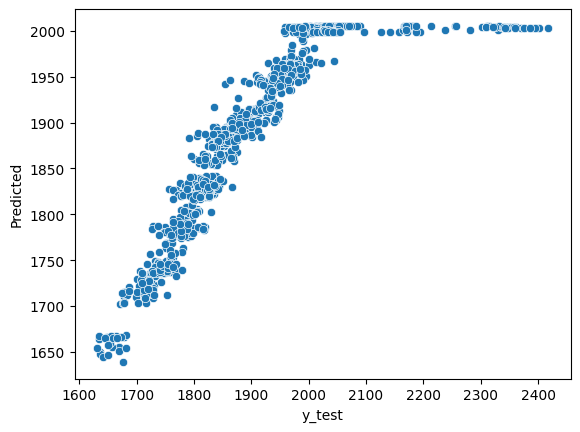

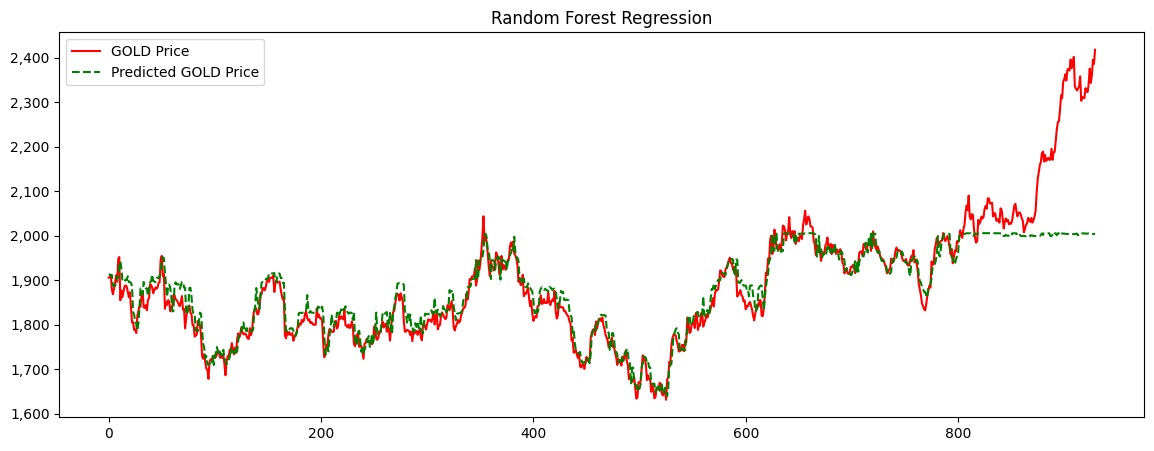

['best_random1.pkl']

In [51]:
best_random = RandomForestRegressor(**rf_random.best_params_)
best_random.fit(X_train_valid_scaled, y_train_valid)
random_accuracy = ACC(best_random, X_test_scaled, y_test, X_train_valid_scaled, y_train_valid)
joblib.dump(best_random, "best_random1.pkl")